In [1]:
import sys
sys.path.append('../../Codes/lib/')
from functions_1 import*
from functions_2 import*
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams['text.usetex'] = True
Text_files_path = '/Users/robertomorantovar/Dropbox/Research/immune_system/primary_immune_response/'

%autosave 60

Autosaving every 60 seconds


In [2]:
data = pd.read_excel(Text_files_path + 'data/Victora_2016/aad3439-databases1.xlsx', header=1, sheet_name = 'Photoactivation')

/Users/robertomorantovar/anaconda3/envs/roberto/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


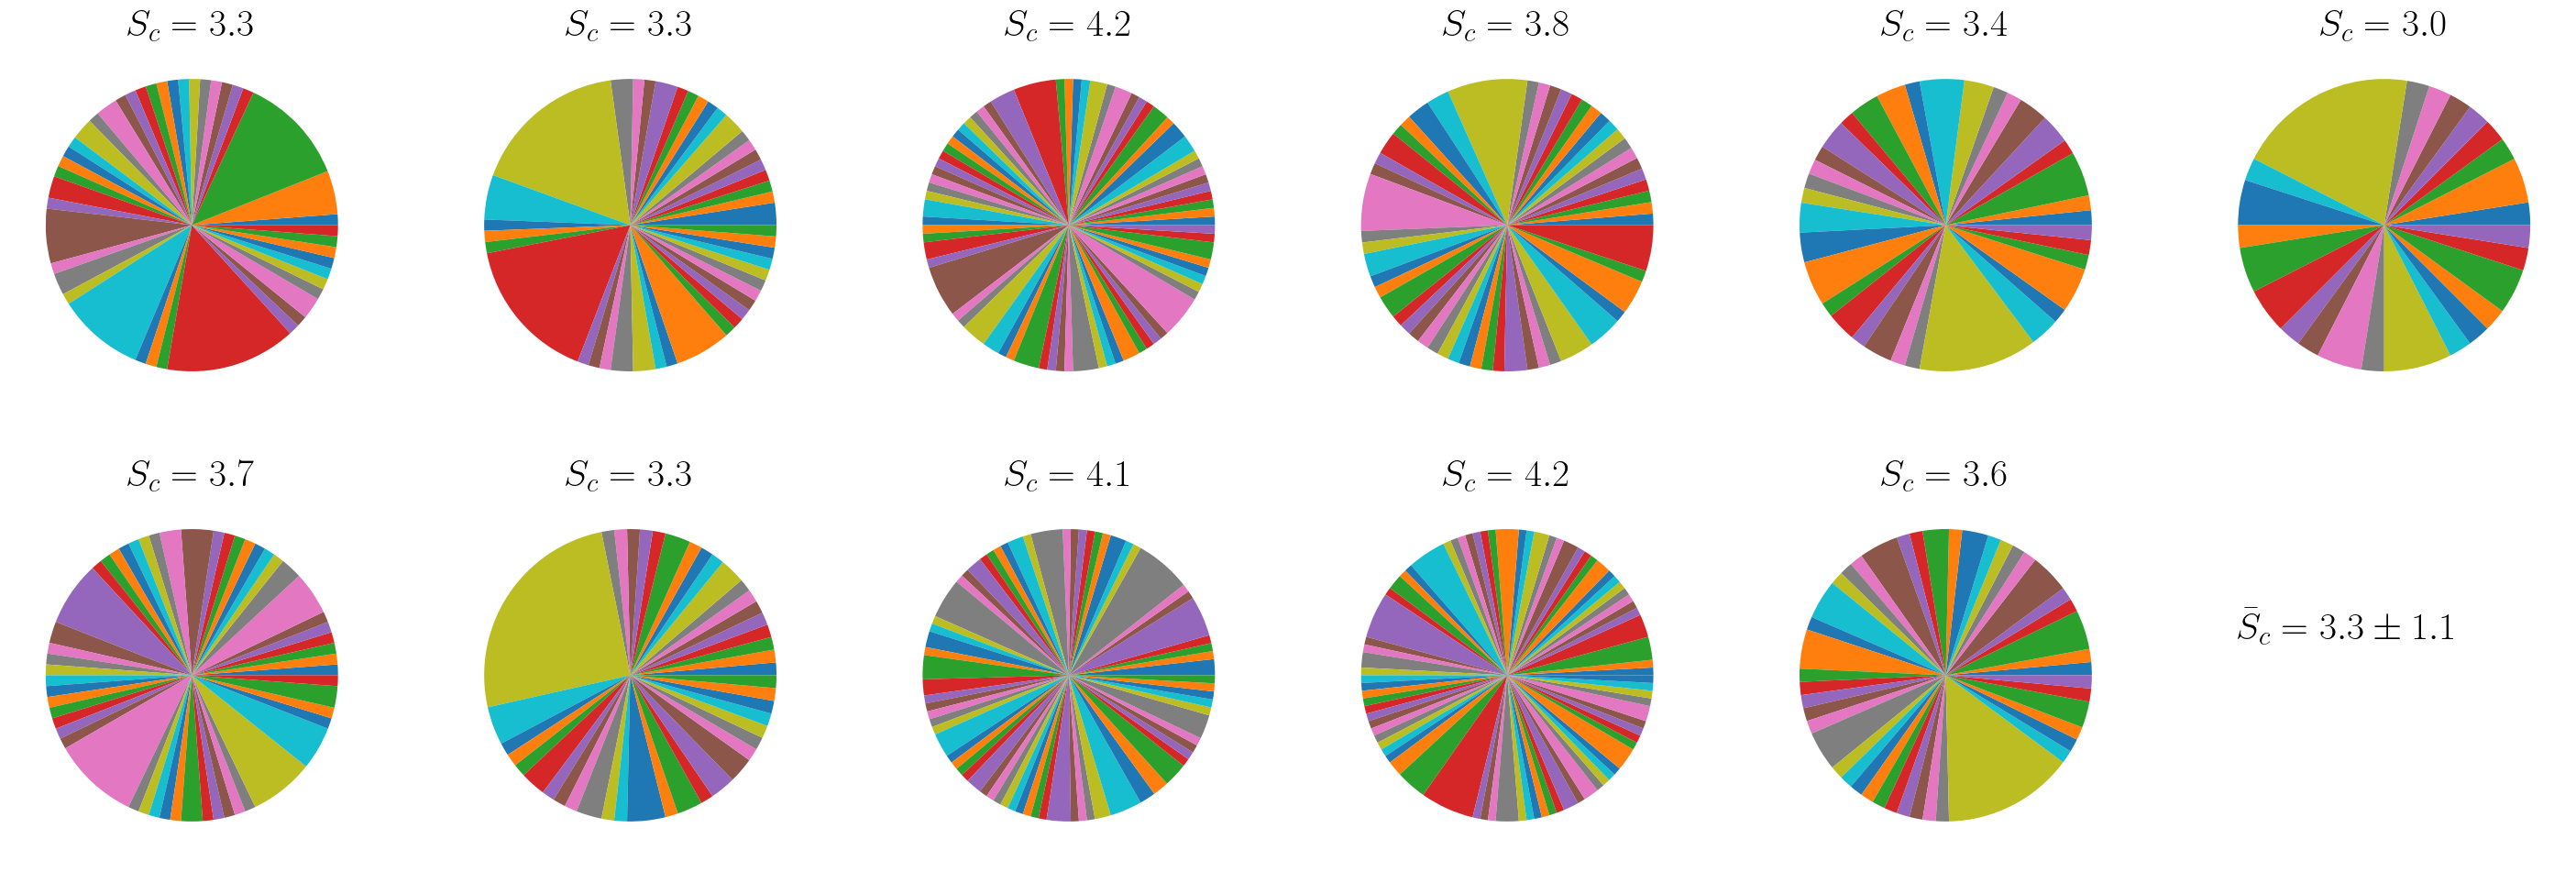

In [3]:
data_early = data.loc[(data['Figures']=='2/S3')]
lns = np.arange(1, 7)
gcs = np.arange(1, 3)
fig, ax = plt.subplots(2, 6, figsize = (30, 10), gridspec_kw={'left':0.02, 'right':.95, 'bottom':.05, 'top': 0.95}, edgecolor = 'black')
S = []
L_act = []
for i, ln in enumerate(lns):
    #print(str(ln))
    data_ln = data_early.loc[data_early['LN']==ln]
    for j, gc in enumerate(gcs):
        #print(str(gc))
        data_gc = data_ln.loc[data_ln['GC']==gc]
        CDR3, counts = np.unique(np.array((list(data_gc['CDR3:']))), return_counts = True)
        N = np.sum(counts)
        S_i = -np.sum((counts/N)*np.log((counts/N)))
        S.append(S_i)
        L_act.append(np.size(counts))
        if S_i != 0:
            ax[j, i].pie(counts)
            ax[j, i].set_title(r'$S_c=%.1f$'%(S_i), fontsize = 30)
        else:
            ax[j, i].axis('off')
            ax[j, i].text(x = .1, y = .6, s = r'$\bar S_c = %.1f \pm %.1f$'%(np.mean(S), np.sqrt(np.var(S))), fontsize = 30)
fig.savefig('../../Figures/primary_immune_response/11_data_Victora/2016/clonal_entropy.pdf')


CGG
OVA
HA
NP-OVA


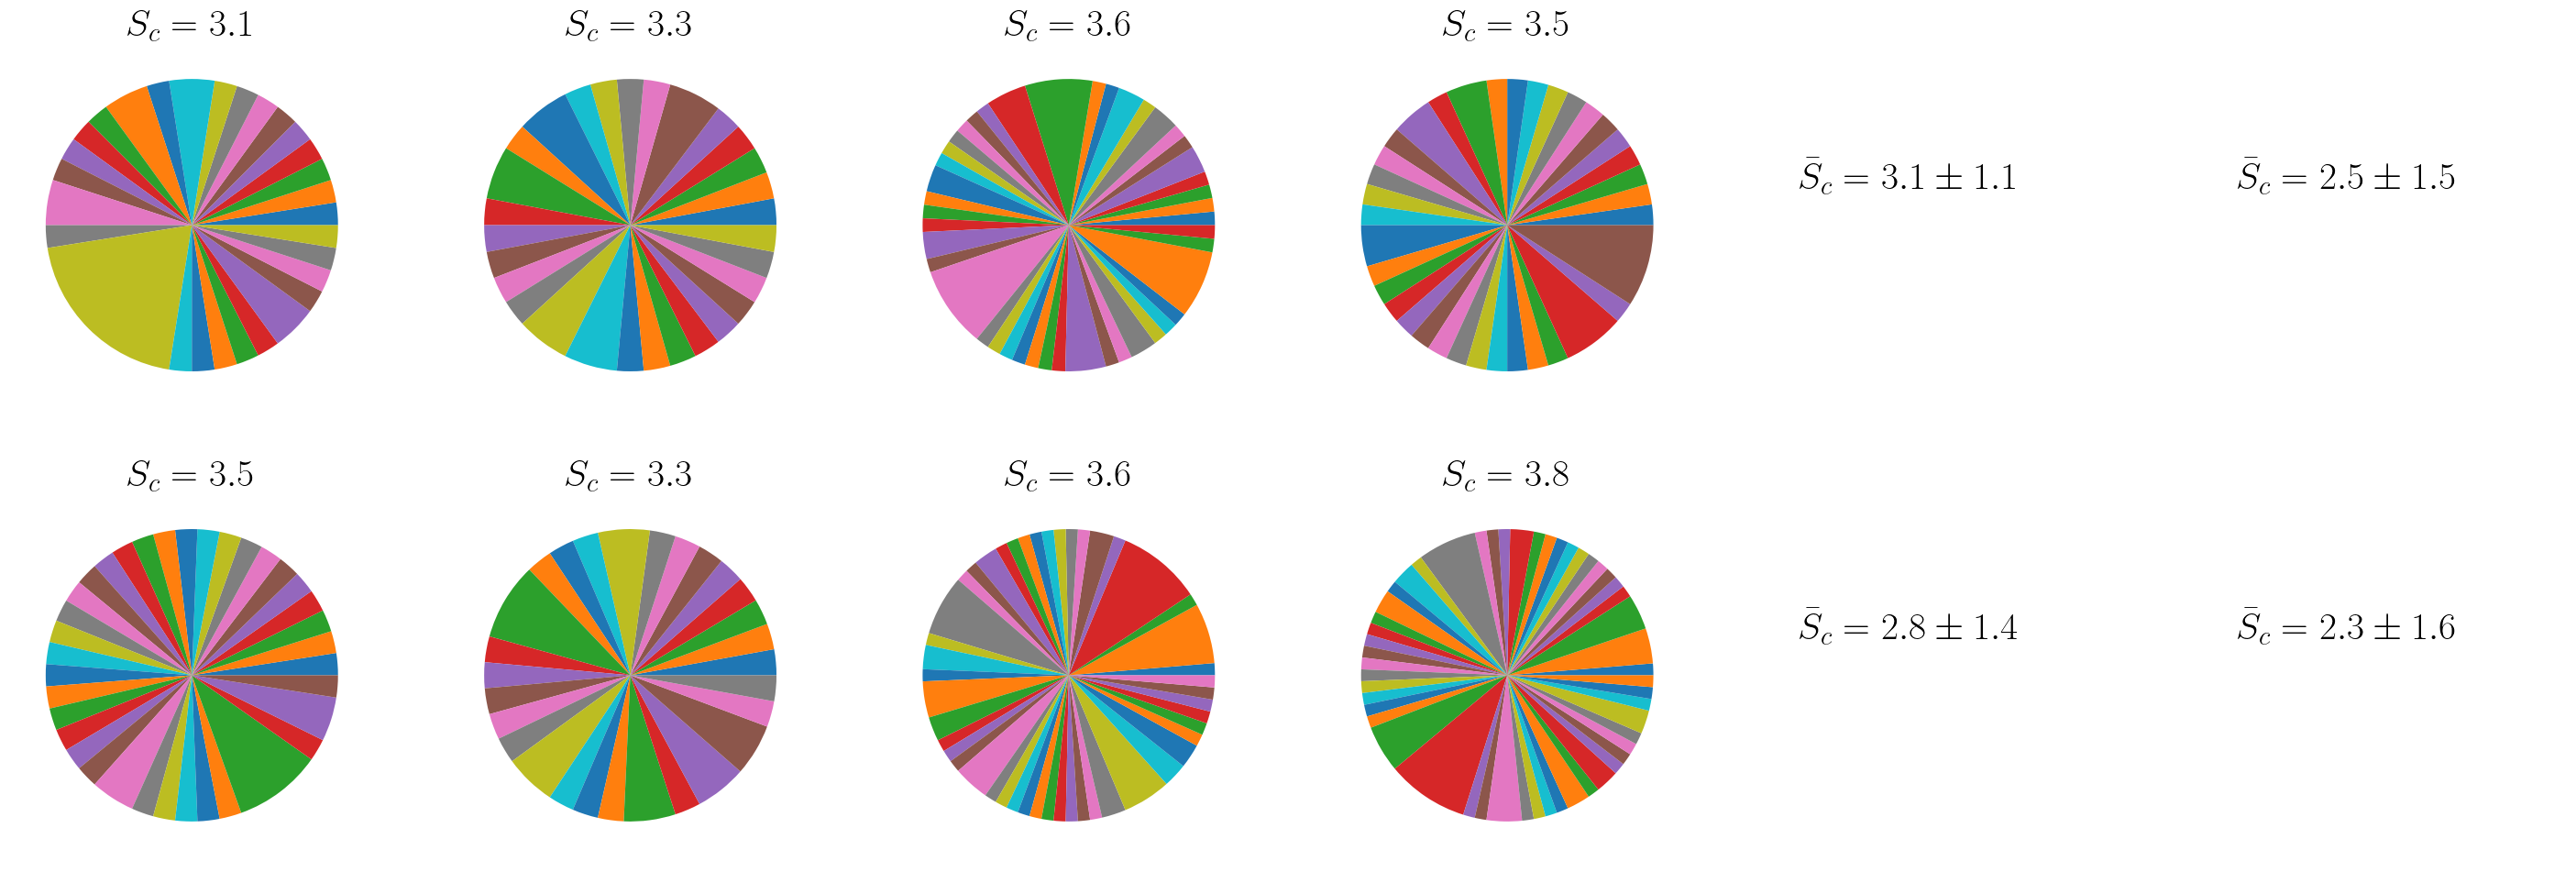

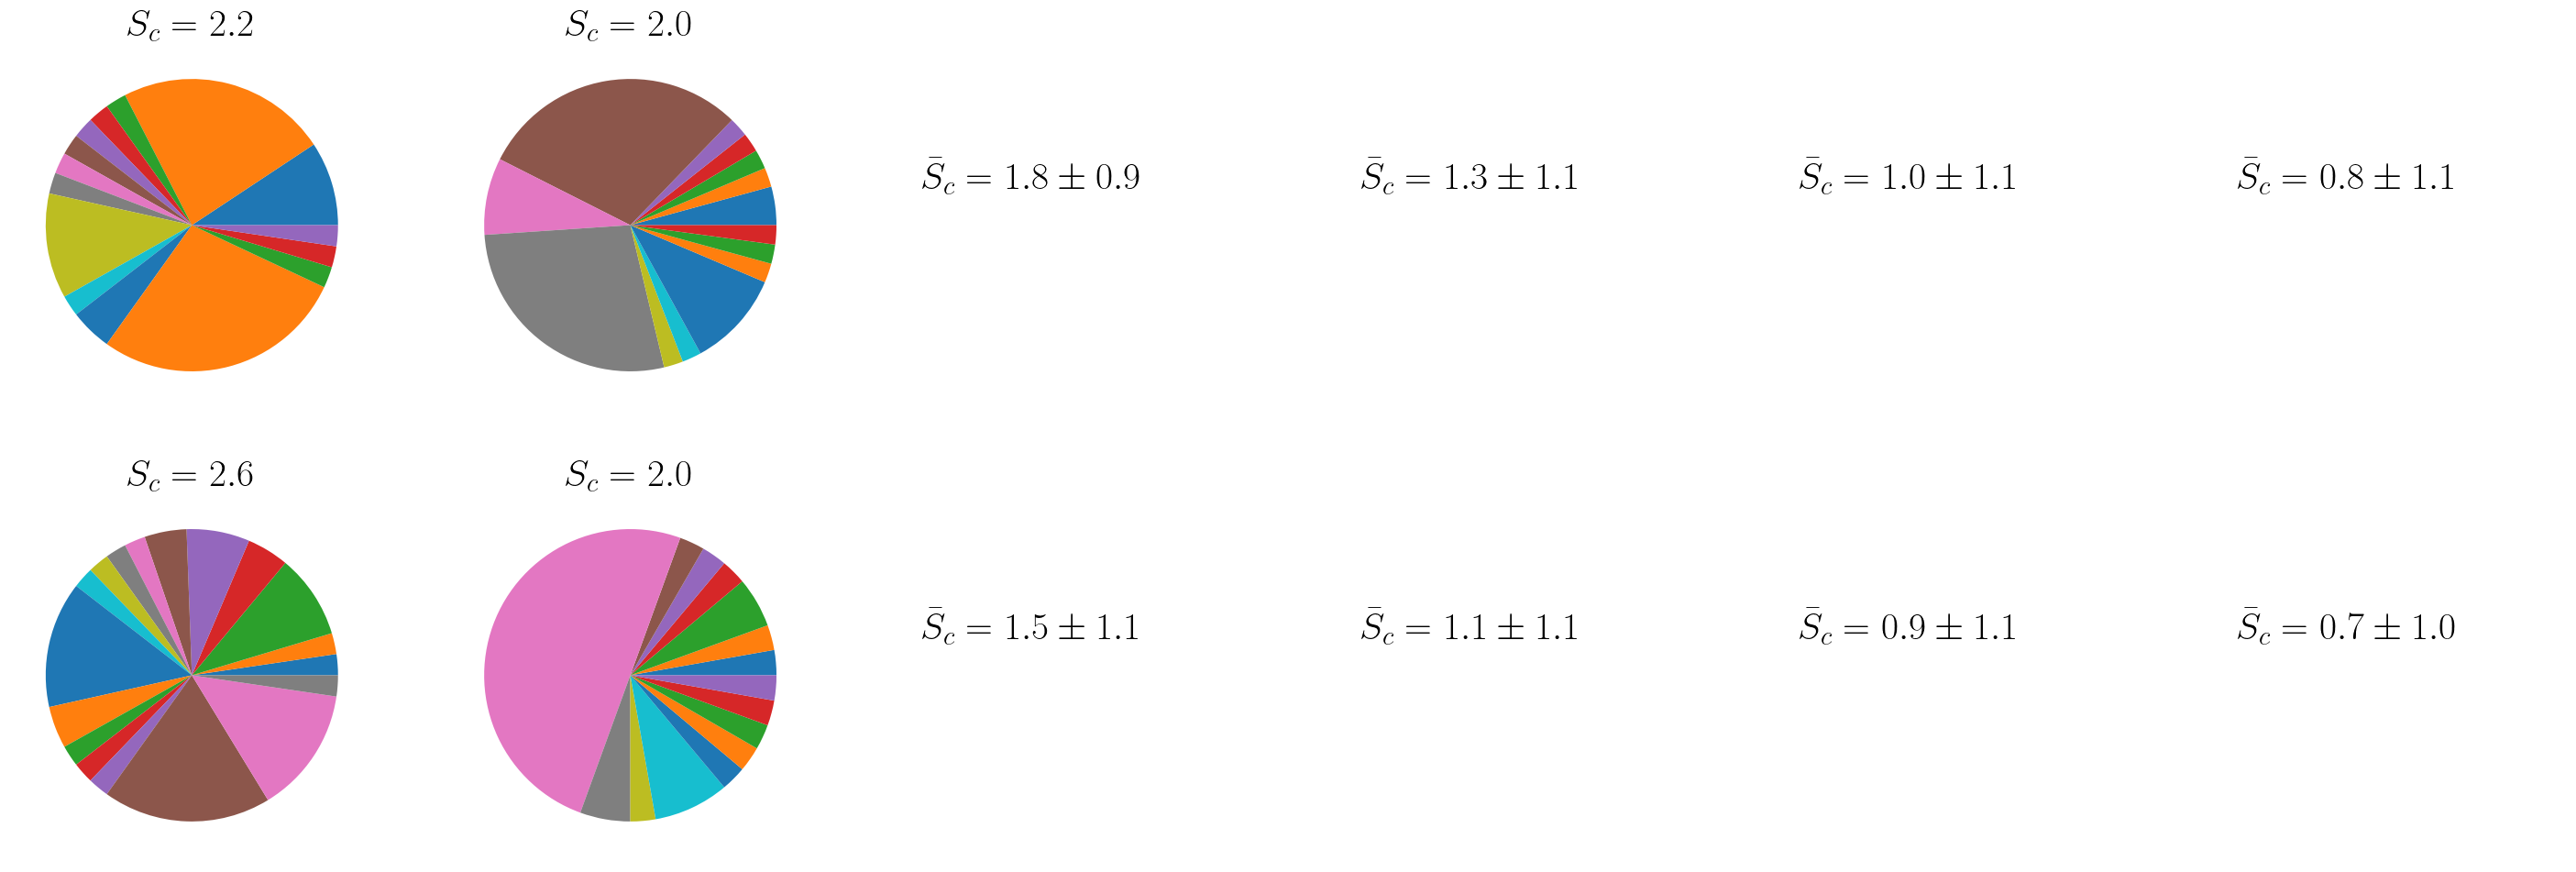

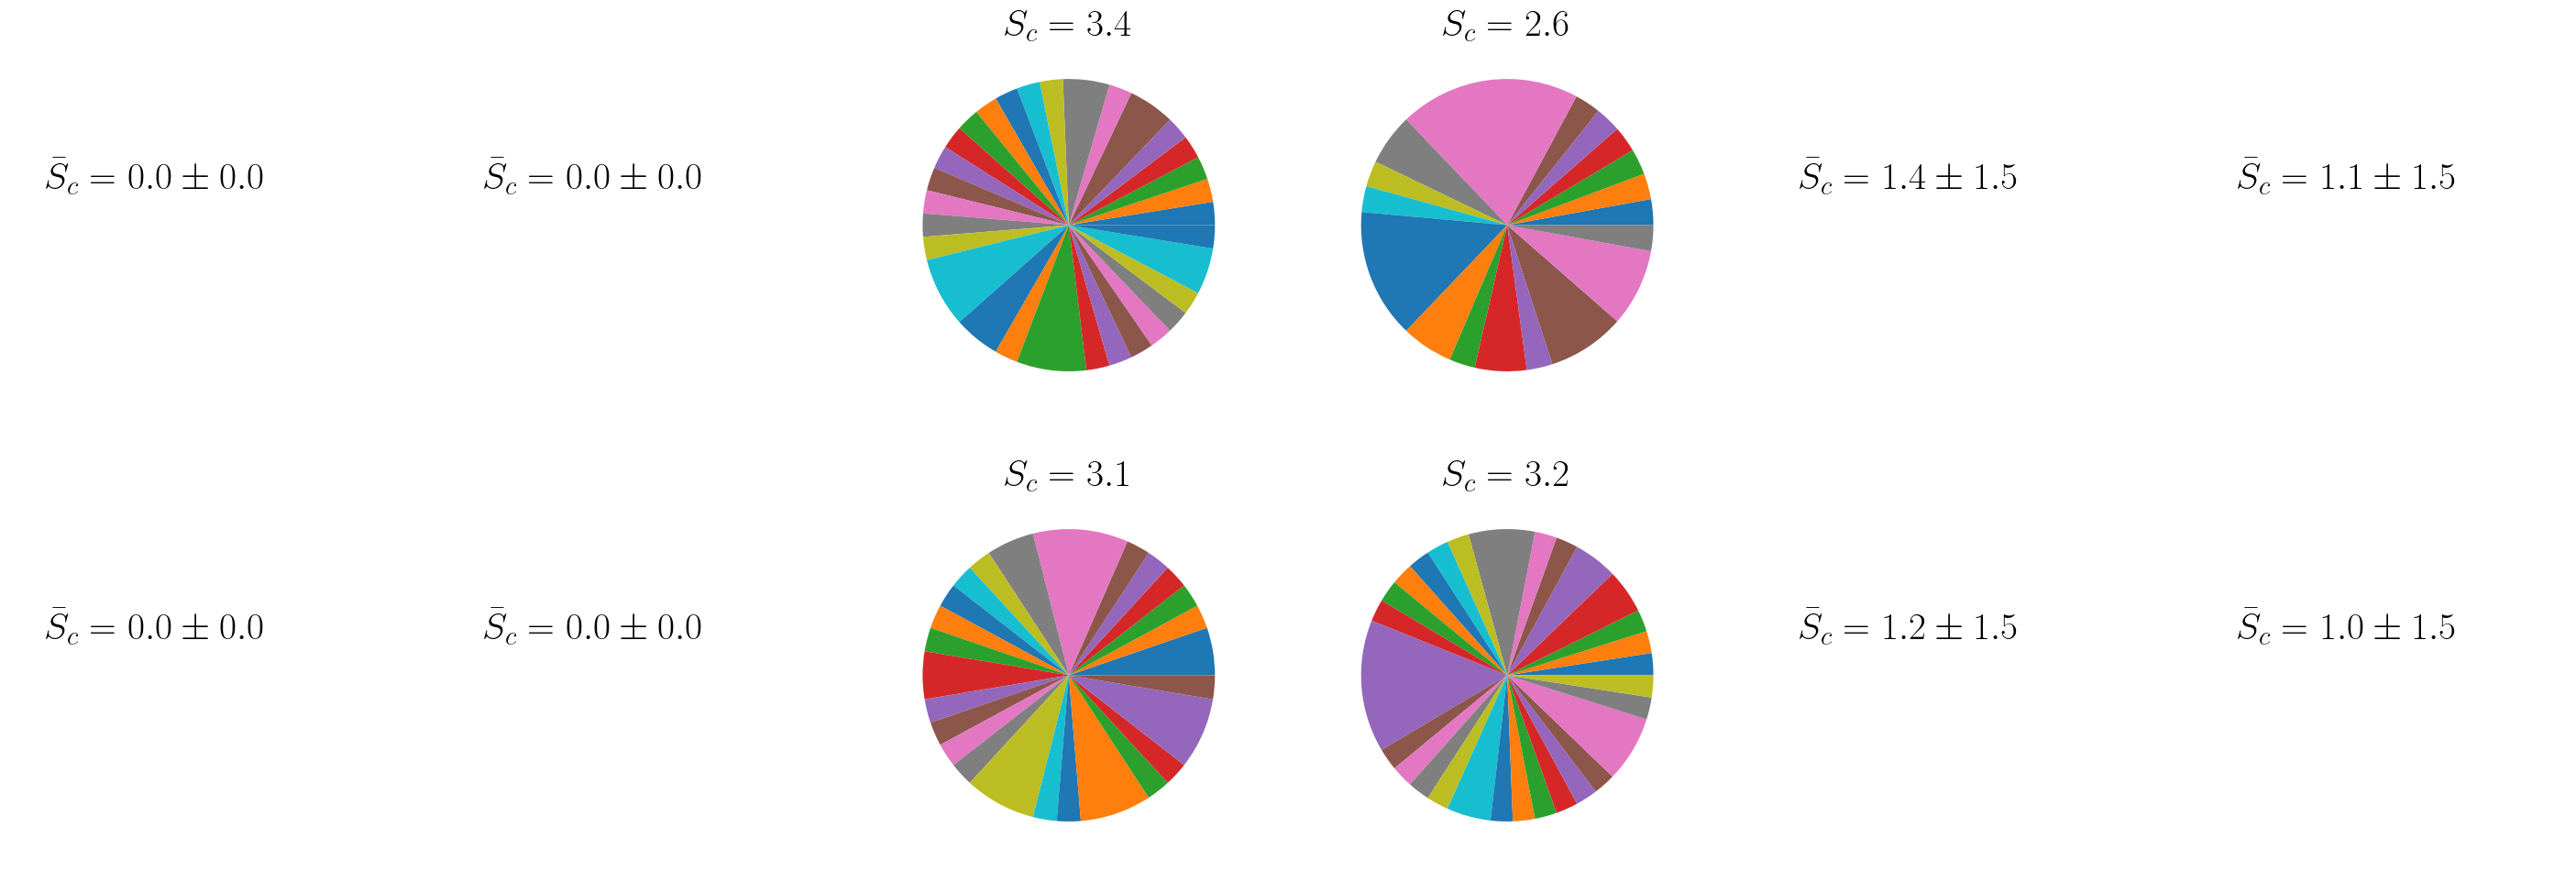

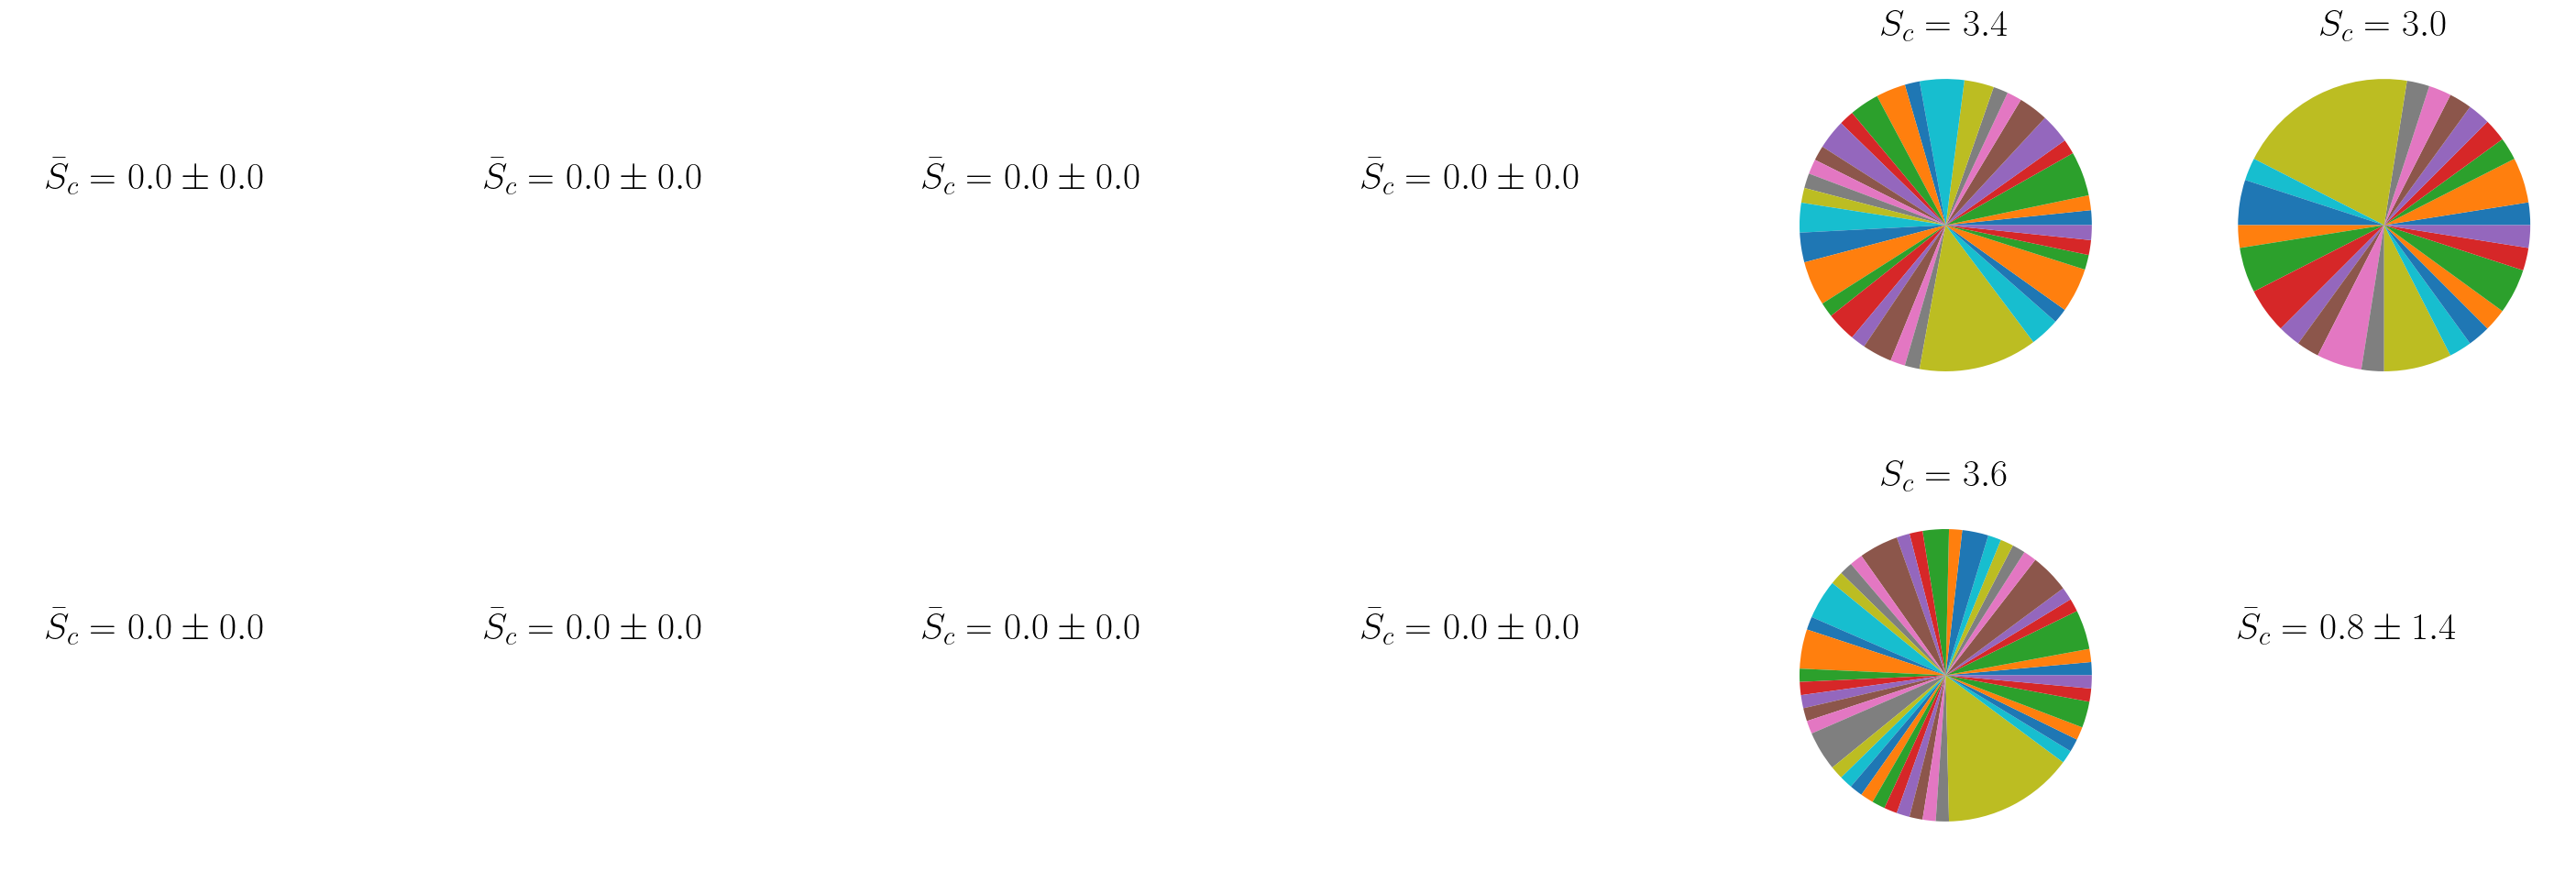

In [4]:
antigens = ['CGG', 'OVA', 'HA', 'NP-OVA']
for antigen in antigens:
    print(antigen)
    data_early = data.loc[(data['Figures']=='2/S3') & (data['Antigen']==antigen)]
    lns = np.arange(1, 7)
    gcs = np.arange(1, 3)
    fig, ax = plt.subplots(2, 6, figsize = (30, 10), gridspec_kw={'left':0.02, 'right':.95, 'bottom':.05, 'top': 0.95}, edgecolor = 'black')
    S = []
    L_act = []
    for i, ln in enumerate(lns):
        #print(str(ln))
        data_ln = data_early.loc[data_early['LN']==ln]
        for j, gc in enumerate(gcs):
            #print(str(gc))
            data_gc = data_ln.loc[data_ln['GC']==gc]
            CDR3, counts = np.unique(np.array((list(data_gc['CDR3:']))), return_counts = True)
            N = np.sum(counts)
            S_i = -np.sum((counts/N)*np.log((counts/N)))
            S.append(S_i)
            L_act.append(np.size(counts))
            if S_i != 0:
                ax[j, i].pie(counts)
                ax[j, i].set_title(r'$S_c=%.1f$'%(S_i), fontsize = 30)
            else:
                ax[j, i].axis('off')
                ax[j, i].text(x = .1, y = .6, s = r'$\bar S_c = %.1f \pm %.1f$'%(np.mean(S), np.sqrt(np.var(S))), fontsize = 30)
    fig.savefig('../../Figures/primary_immune_response/11_data_Victora/2016/clonal_entropy_'+antigen+'.pdf')
    

(array([8., 0., 0., 0., 0., 0., 0., 0., 1., 2.]),
 array([0.        , 0.35535303, 0.71070607, 1.0660591 , 1.42141214,
        1.77676517, 2.13211821, 2.48747124, 2.84282427, 3.19817731,
        3.55353034]),
 <BarContainer object of 10 artists>)

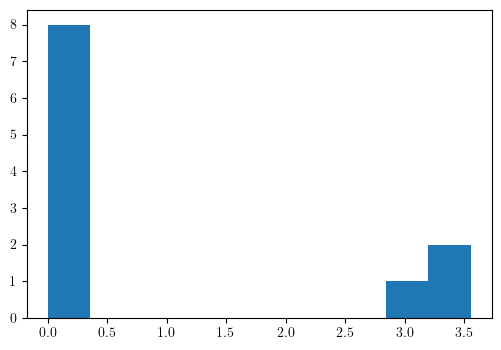

In [5]:
S = S[:-1]
fig, ax = plt.subplots(figsize = (6, 4))
ax.hist(S)

-0.5760086206091148 0.04877409570862663


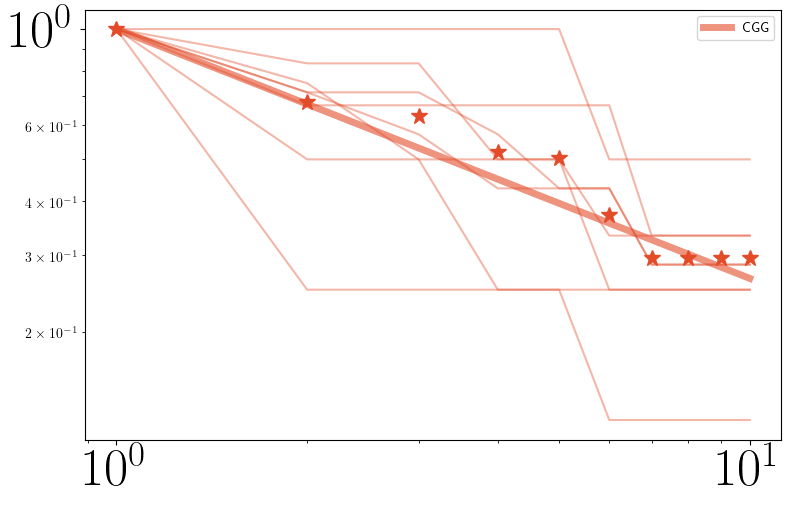

In [13]:
antigens = ['CGG']#, 'OVA', 'HA', 'NP-OVA']
colors_antigen = [my_red, my_blue, my_green, my_brown]
fig, ax = plt.subplots(figsize=(5*1.62,5), gridspec_kw={'left':0.12, 'right':.98, 'bottom':.1, 'top': 0.96})
avg_slope = 0
for a, antigen in enumerate(antigens):
    data_early = data.loc[(data['Figures']=='2/S3') & (data['Antigen']==antigen)]
    lns = np.arange(1, 7)
    gcs = np.arange(1, 3)
    S = []
    max_rank = 10
    counts_per_ranking = np.zeros(max_rank)
    x_avg = np.zeros(max_rank)
    for i, ln in enumerate(lns):
        #print(str(ln))
        data_ln = data_early.loc[data_early['LN']==ln]
        for j, gc in enumerate(gcs):
            #print(str(gc))
            data_gc = data_ln.loc[data_ln['GC']==gc]
            CDR3, counts = np.unique(np.array((list(data_gc['CDR3:']))), return_counts = True)
            if(np.sum(counts)>0):
                sort_index = counts.argsort()
                largest = np.array(counts)[sort_index][-1]
                x = np.flip(counts[sort_index])[:max_rank]/largest
                for k in range(max_rank):
                    if(x[k]>0):
                        counts_per_ranking[k]+=1
                        x_avg[k]+=x[k]
                ax.plot(range(1,max_rank+1), x, alpha = .4, color = colors_antigen[a])

    x_avg/=counts_per_ranking
    ax.plot(range(1,max_rank+1), x_avg, lw = 2, marker = '*', ls = '', ms = 12, color = colors_antigen[a])

    popt, pcov = curve_fit(my_linear_func, np.log(range(1,max_rank+1)), np.log(x_avg))

    ax.plot(range(1,max_rank+1), range(1,max_rank+1)**(popt[1]), lw = 5, marker = '', ls = '-',
            color = colors_antigen[a], alpha = .6, label = antigen)

    print(popt[1], np.sqrt(pcov[1,1]))
    avg_slope+=popt[1]
# print(avg_slope/4)
ax.legend()
my_plot_layout(ax =ax, yscale = 'log', xscale = 'log', ticks_labelsize= 38)
# fig.savefig('../../Figures/primary_immune_response/11_Victora_2016/ranking.pdf')


In [12]:
data_early

,Sequence ID,Figures,LN,GC,Antigen,V,J,D,AA JUNCTION,# Mutations,V-Gene (VBASE2):,CDR3:,# Mutations.1,SEQ,Light chain,Comments
607,PATP7A01IgM,2/S3,1,1,CGG,HV1-53*01,HJ4*01,HD3-3*01,CARRGKNYYAMDYW,0,musIGHV329,ARRGKNYYAMDY,0.0,GGGACTGAACTGGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,NaN,NaN
608,PATP7A02IgG,2/S3,1,1,CGG,HV1-50*01,HJ4*01,HD1-1*02,CARGGYYAMDYW,0,musIGHV326,ARGGYYAMDY,0.0,GGGGCTGAGCTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,NaN,NaN
609,PATP7A03IgM,2/S3,1,1,CGG,HV1-81*01,HJ2*01,HD3-1*01,CARDGAYFDYW,0,musIGHV363,ARDGAYFDY,0.0,GGAGCTGAGCTGGCGAGGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,NaN,NaN
610,PATP7A04IgM,2/S3,1,1,CGG,HV1-53*01,HJ2*01,HD1-2*01,CARDDGYW,0,musIGHV329,ARDDGY,0.0,GGGACTGAACTGGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,NaN,NaN
611,PATP7A05IgM,2/S3,1,1,CGG,HV1-69*01,HJ3*01,HD3-2*02,CARDSSGPRFAYW,1,musIGHV353,ARDSSGPRFAY,1.0,GGGGCTGAGCTTGTGATGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,D6N0519P5D07IgM,2/S3,6,1,NP-OVA,HV1-72*01,HJ4*01,HD5-7*01,CARREPLYYAMDYW,1,musIGHV057,ARREPLYYAMDY,1.0,GGGGCTGAGCTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,lambda,NaN
1508,D6N0519P5D08IgM,2/S3,6,1,NP-OVA,HV1-72*01,HJ4*01,HD1-1*01,CARYYGSGYYAMDYW,3,musIGHV057,ARYYGSGYYAMDY,3.0,GGGACTGAACTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,lambda,NaN
1509,D6N0519P5D09IgM,2/S3,6,1,NP-OVA,HV1-64*01,HJ3*01,HD3-2*02,CARRWAAQATPFAYW,2,musIGHV346,ARRWAAQATPFAY,2.0,GGGGCTGAGCTGGTAAAGCCTGGGGCTTCAGTGAAGTTGTCCTGCA...,lambda,NaN
1510,D6N0519P5D10IgM,2/S3,6,1,NP-OVA,HV1-72*01,HJ4*01,HD2-1*01,CARYYYGILYAMDYW,2,musIGHV057,ARYYYGILYAMDY,2.0,GGGGCTGAGCTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,lambda,NaN


-0.6643753243957097 0.06839690314488818


(0.04, 1.1)

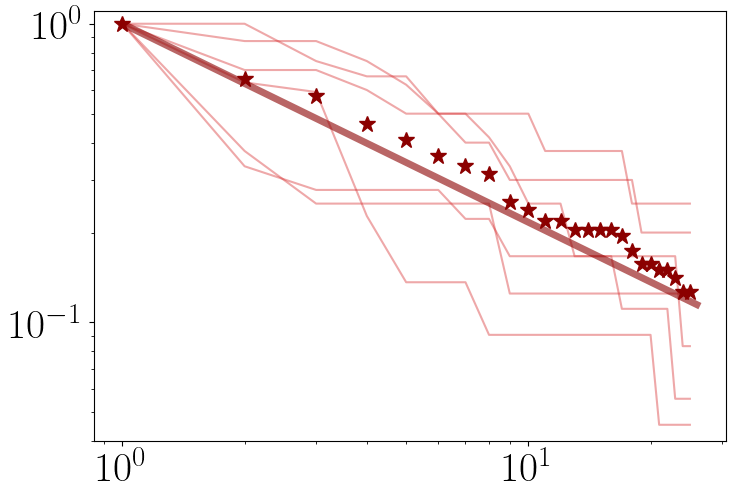

In [80]:
N_ensemble = 200
data_early = data.loc[data['Figures']=='2/S3']
lns = np.arange(1, 7)
gcs = np.arange(1, 3)
fig, ax = plt.subplots(figsize=(5*1.62, 5), gridspec_kw={'left':0.12, 'right':.9, 'bottom':.1, 'top': 0.96})
S = []
max_rank = 25

Y = []
X = []
slopes_p = []
slopes_g = []

counts_per_ranking = np.zeros(max_rank)
x_avg = np.zeros(max_rank)
for i, ln in enumerate(lns):
        #print(str(ln))
        data_ln = data_early.loc[data_early['LN']==ln]
        CDR3, counts = np.unique(np.array((list(data_ln['CDR3:']))), return_counts = True)
        #print(counts)
        if(np.sum(counts)>0):
            sort_index = counts.argsort()
            largest = np.max(counts)
            x = np.flip(counts[sort_index])[:max_rank]
            for k in range(max_rank):
                if(x[k]>0):
                    counts_per_ranking[k]+=1
                    x_avg[k]+=x[k]/np.max(x)
            ax.plot(range(1,max_rank+1), x/np.max(x) , color = 'tab:red', alpha = .4)
x_avg/=counts_per_ranking

for n in range(N_ensemble):
    counts_per_ranking = np.zeros(max_rank)
    x_p_avg = np.zeros(max_rank)
#     x_g_avg = np.zeros(max_rank)
    for i, ln in enumerate(lns):
        #print(str(ln))
        data_ln = data_early.loc[data_early['LN']==ln]
        CDR3, counts = np.unique(np.array((list(data_ln['CDR3:']))), return_counts = True)
        #print(counts)
        if(np.sum(counts)>0):
            sort_index = counts.argsort()
            largest = np.max(counts)
            cs = np.flip(counts[sort_index])[:max_rank]
            cs_p = np.random.poisson(lam = cs)
#             x_g = x + np.random.normal(0, np.sqrt(x))
            for k in range(max_rank):
                if(cs[k]>0):
                    counts_per_ranking[k]+=1
                    x_p_avg[k]+=cs_p[k]/np.max(cs_p)
#                     x_g_avg[k]+=x_g[k]/np.max(x_g)
            #Y.append(np.log(x) + dy)
            #X.append(np.log(max_rank+1))

    x_p_avg/=counts_per_ranking
    popt_p, pcov = curve_fit(my_linear_func, np.log(range(1,max_rank+1)), np.log(x_p_avg))
    #popt_g, pcov = curve_fit(my_linear_func, np.log(range(1,max_rank+1)), np.log(x_g_avg))
    slopes_p.append(popt_p[1])
    #slopes_g.append(popt_g[1])

print(np.mean(slopes_p), np.std(slopes_p))
#print(np.mean(slopes_g), np.std(slopes_g))
#R = scipy.stats.linregress(X,Y)
#r = R.slope

ax.plot(range(1,max_rank+1), x_avg, lw = 2, marker = '*', ls = '', color = 'darkred', ms = 12)

ax.plot(np.linspace(1,max_rank+1, 100), np.linspace(1,max_rank+1, 100)**(np.mean(slopes_p)), lw = 5, marker = '', ls = '-', color = 'darkred', alpha = .6)
#ax.plot(np.linspace(1,max_rank+1, 100), np.linspace(1,max_rank+1, 100)**(np.mean(slopes_g)), lw = 5, marker = '', ls = '--', color = 'darkred', alpha = .6)

#print(popt[1], np.sqrt(pcov[1,1]))
my_plot_layout(ax =ax, yscale = 'log', xscale = 'log', ticks_labelsize= 30, x_fontsize=30, y_fontsize=30 )
ax.set_ylim(bottom = 4e-2, top = 1.1)
# fig.savefig('../../Figures/primary_immune_response/11_Victora_2016/ranking2.pdf', transparent=.2)


-0.5678731266498134 0.002561142438467098


(0.04, 1.1)

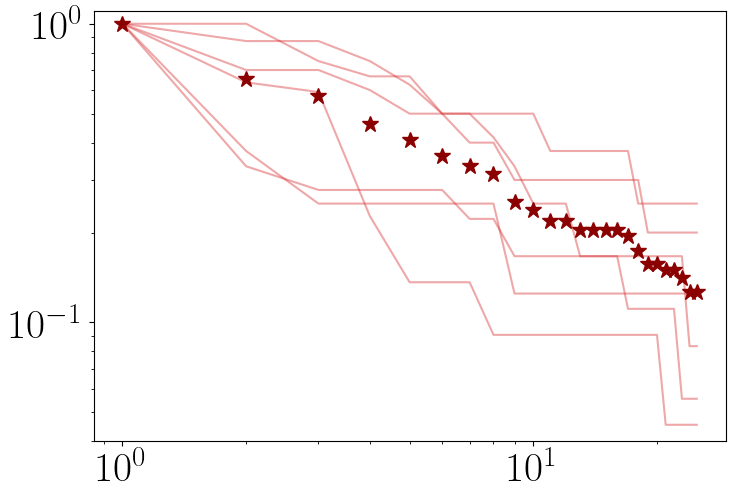

In [82]:
N_ensemble = 200
data_early = data.loc[data['Figures']=='2/S3']
lns = np.arange(1, 7)
gcs = np.arange(1, 3)
fig, ax = plt.subplots(figsize=(5*1.62, 5), gridspec_kw={'left':0.12, 'right':.9, 'bottom':.1, 'top': 0.96})
S = []
max_rank = 25

Y = []
X = []
slopes_p = []
slopes_g = []

counts_per_ranking = np.zeros(max_rank)
x_avg = np.zeros(max_rank)
for i, ln in enumerate(lns):
        #print(str(ln))
        data_ln = data_early.loc[data_early['LN']==ln]
        CDR3, counts = np.unique(np.array((list(data_ln['CDR3:']))), return_counts = True)
        #print(counts)
        if(np.sum(counts)>0):
            sort_index = counts.argsort()
            largest = np.max(counts)
            x = np.flip(counts[sort_index])[:max_rank]
            for k in range(max_rank):
                if(x[k]>0):
                    counts_per_ranking[k]+=1
                    x_avg[k]+=x[k]/np.max(x)
            ax.plot(range(1,max_rank+1), x/np.max(x) , color = 'tab:red', alpha = .4)
x_avg/=counts_per_ranking


for i, ln in enumerate(lns):
    #print(str(ln))
    data_ln = data_early.loc[data_early['LN']==ln]
    CDR3, counts = np.unique(np.array((list(data_ln['CDR3:']))), return_counts = True)
    #print(counts)
    if(np.sum(counts)>0):
        sort_index = counts.argsort()
        largest = np.max(counts)
        cs = np.flip(counts[sort_index])[:max_rank]
        cs_p = np.random.poisson(lam = cs, size = [N_ensemble, max_rank])
        max_cs_p = np.max(cs_p, axis = 1)
        x_cs_avg = np.average((cs_p.T/max_cs_p).T, axis = 0)
# #             x_g = x + np.random.normal(0, np.sqrt(x))
#             for k in range(max_rank):
#                 if(cs[k]>0):
#                     counts_per_ranking[k]+=1
#                     x_p_avg[k]+=cs_p[k]/np.max(cs_p)
#                     x_g_avg[k]+=x_g[k]/np.max(x_g)
        #Y.append(np.log(x) + dy)
        #X.append(np.log(max_rank+1))

#x_p_avg/=counts_per_ranking
popt_p, pcov = curve_fit(my_linear_func, np.log(range(1,max_rank+1)), np.log(x_cs_avg))
#popt_g, pcov = curve_fit(my_linear_func, np.log(range(1,max_rank+1)), np.log(x_g_avg))
#slopes_g.append(popt_g[1])

print(popt_p[1], pcov[1,1])
#R = scipy.stats.linregress(X,Y)
#r = R.slope

ax.plot(range(1,max_rank+1), x_avg, lw = 2, marker = '*', ls = '', color = 'darkred', ms = 12)
ax.plot(np.linspace(1,max_rank+1, 100), np.linspace(1,max_rank+1, 100)**(np.mean(slopes_p)), lw = 5, marker = '', ls = '-', color = 'darkred', alpha = .6)
my_plot_layout(ax =ax, yscale = 'log', xscale = 'log', ticks_labelsize= 30, x_fontsize=30, y_fontsize=30 )
ax.set_ylim(bottom = 4e-2, top = 1.1)
# fig.savefig('../../Figures/primary_immune_response/11_Victora_2016/ranking2.pdf', transparent=.2)


In [72]:
A = np.random.poisson(lam = [10, 5, 1], size = [5, 3])
print(A)
max_A = np.max(A, axis = 1)
print(max_A)
np.average((A.T/max_A).T, axis = 0)

[[11  9  1]
 [ 7  6  0]
 [11  5  1]
 [ 5  4  0]
 [13  5  0]]
[11  7 11  5 13]


array([1.        , 0.6628971 , 0.03636364])

CGG


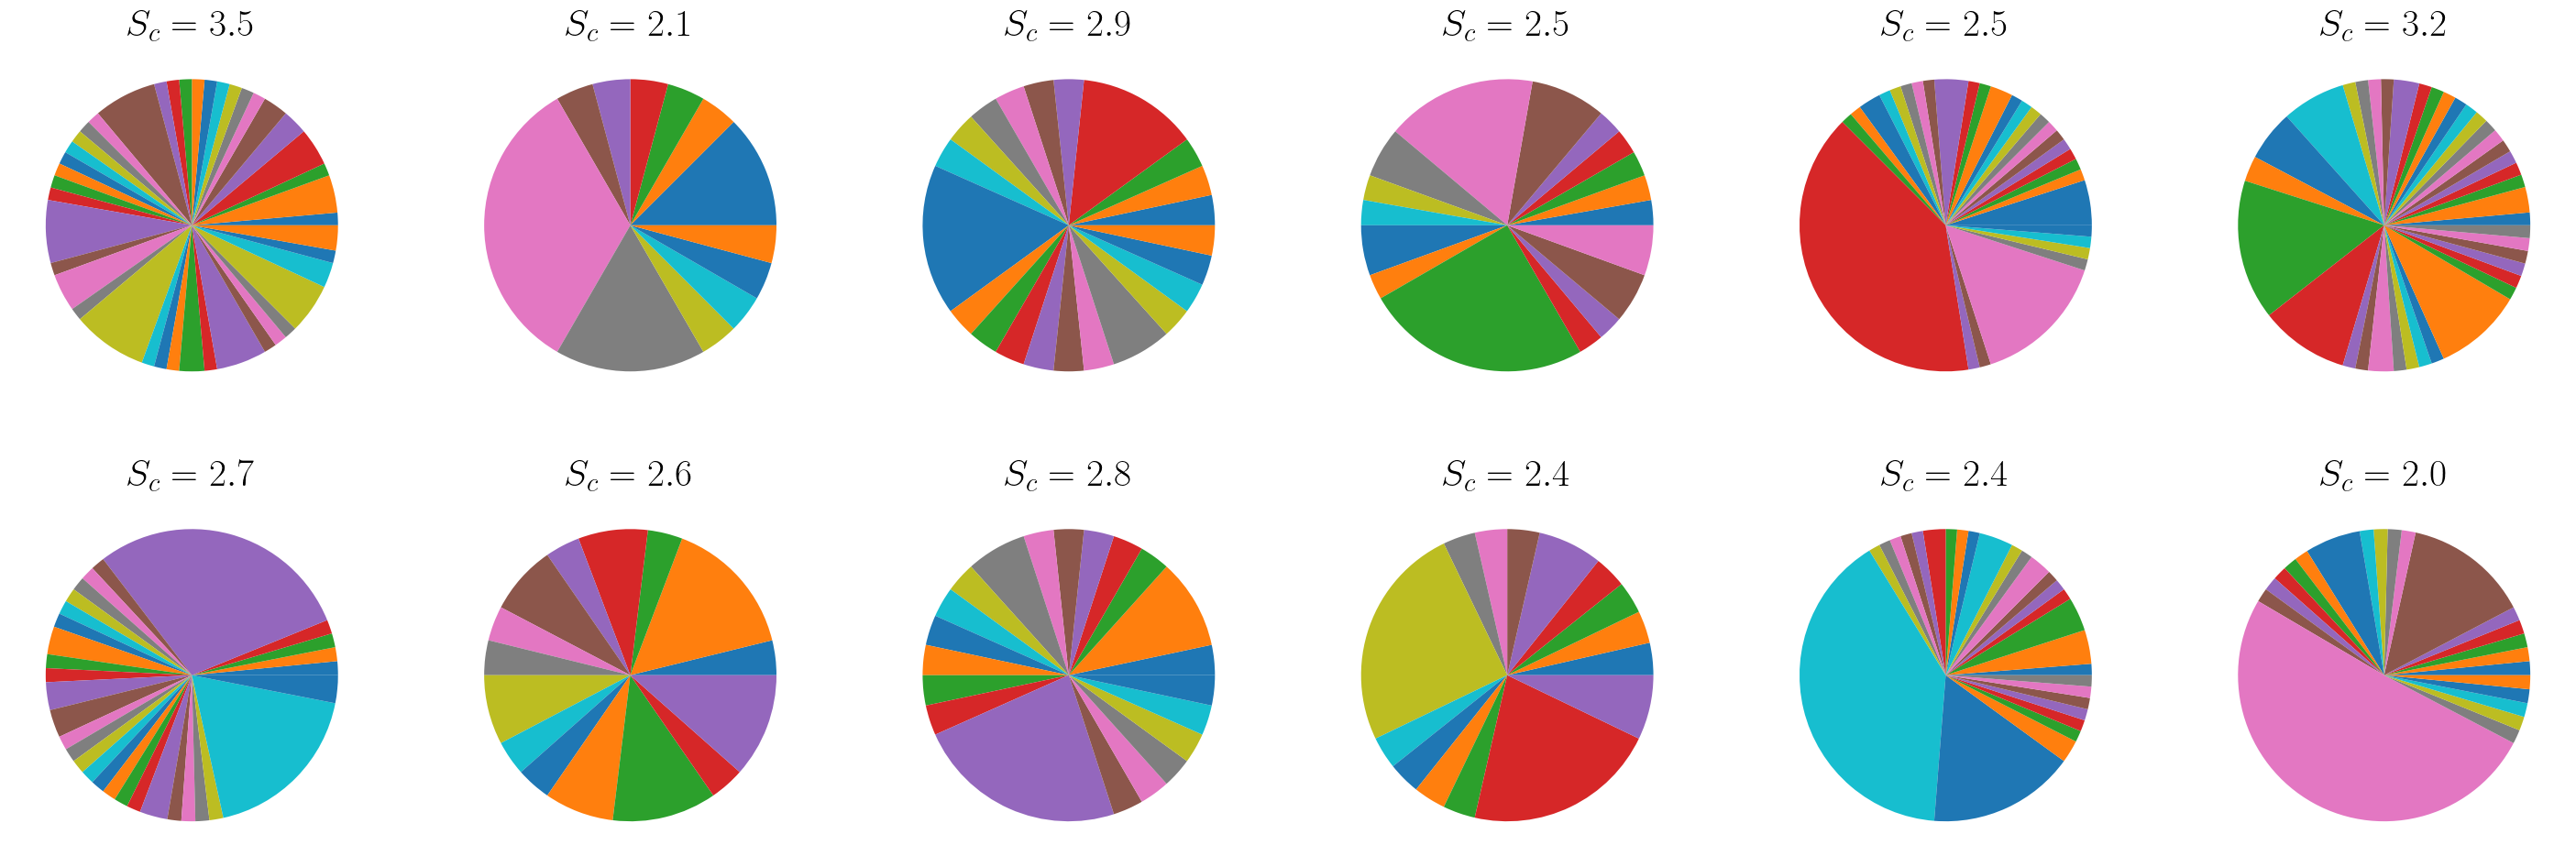

In [10]:
antigens = ['CGG']
for antigen in antigens:
    print(antigen)
    data_late = data.loc[(data['Figures']=='1/S2') & (data['Antigen']==antigen)]
    lns = np.arange(1, 7)
    gcs = np.arange(1, 3)
    fig, ax = plt.subplots(2, 6, figsize = (30, 10), gridspec_kw={'left':0.02, 'right':.95, 'bottom':.05, 'top': 0.95}, edgecolor = 'black')
    S = []
    L_act = []
    for i, ln in enumerate(lns):
        #print(str(ln))
        data_ln = data_late.loc[data_late['LN']==ln]
        for j, gc in enumerate(gcs):
            #print(str(gc))
            data_gc = data_ln.loc[data_ln['GC']==gc]
            CDR3, counts = np.unique(np.array((list(data_gc['CDR3:']))), return_counts = True)
            N = np.sum(counts)
            S_i = -np.sum((counts/N)*np.log((counts/N)))
            S.append(S_i)
            L_act.append(np.size(counts))
            if S_i != 0:
                ax[j, i].pie(counts)
                ax[j, i].set_title(r'$S_c=%.1f$'%(S_i), fontsize = 30)
            else:
                ax[j, i].axis('off')
                ax[j, i].text(x = .1, y = .6, s = r'$\bar S_c = %.1f \pm %.1f$'%(np.mean(S), np.sqrt(np.var(S))), fontsize = 30)
#     fig.savefig('../../Figures/primary_immune_response/11_data_Victora/2016/clonal_entropy_'+antigen+'.pdf')
    

-0.858531069335796 0.03437717156043017
-0.214632767333949


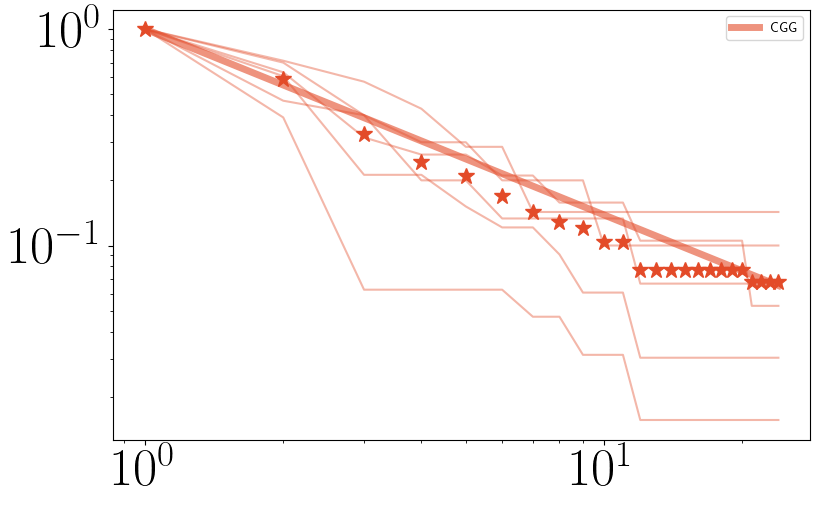

In [21]:
antigens = ['CGG']
colors_antigen = [my_red, my_blue, my_green, my_brown]
fig, ax = plt.subplots(figsize=(5*1.62,5), gridspec_kw={'left':0.12, 'right':.98, 'bottom':.1, 'top': 0.96})
avg_slope = 0
for a, antigen in enumerate(antigens):
    data_late = data.loc[(data['Figures']=='1/S2') & (data['Antigen']==antigen)]
    lns = np.arange(1, 7)
    gcs = np.arange(1, 3)
    S = []
    max_rank = 24
    counts_per_ranking = np.zeros(max_rank)
    x_avg = np.zeros(max_rank)
    for i, ln in enumerate(lns):
        #print(str(ln))
        data_ln = data_late.loc[data_late['LN']==ln]
        CDR3, counts = np.unique(np.array((list(data_ln['CDR3:']))), return_counts = True)
        if(np.sum(counts)>0):
            sort_index = counts.argsort()
            largest = np.array(counts)[sort_index][-1]
            x = np.flip(counts[sort_index])[:max_rank]/largest
            for k in range(max_rank):
                if(x[k]>0):
                    counts_per_ranking[k]+=1
                    x_avg[k]+=x[k]
            ax.plot(range(1,max_rank+1), x, alpha = .4, color = colors_antigen[a])
            

    x_avg/=counts_per_ranking
    ax.plot(range(1,max_rank+1), x_avg, lw = 2, marker = '*', ls = '', ms = 12, color = colors_antigen[a])

    popt, pcov = curve_fit(my_linear_func, np.log(range(1,max_rank+1)), np.log(x_avg))

    ax.plot(range(1,max_rank+1), range(1,max_rank+1)**(popt[1]), lw = 5, marker = '', ls = '-',
            color = colors_antigen[a], alpha = .6, label = antigen)

    print(popt[1], np.sqrt(pcov[1,1]))
    avg_slope+=popt[1]
print(avg_slope/4)
ax.legend()
my_plot_layout(ax =ax, yscale = 'log', xscale = 'log', ticks_labelsize= 38)
# fig.savefig('../../Figures/primary_immune_response/11_Victora_2016/ranking.pdf')
